In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/processed/01_songs_no_missing.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Outliers


In [4]:
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + (1.5 * interquantile_range)
    low_limit = quartile1 - (1.5 * interquantile_range)
    return low_limit, up_limit


def check_outlier(dataframe, col_name, q1=0.10, q3=0.90):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    print(f"{col_name} Lower Limit: {low_limit}, {col_name} Upper Limit: {up_limit}")

    outliers = dataframe[
        (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    ]

    num_outliers = outliers.shape[0]  # Count the number of outliers

    if num_outliers > 0:
        return f"{col_name} : {num_outliers} : True"
    else:
        return f"{col_name} : {num_outliers} : False"

In [5]:
numerical_cols = [
    col
    for col in df.columns
    if pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() > 2
]
numerical_cols

['track_popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [6]:
outliers = []
for col in numerical_cols:
    outliers.append(check_outlier(df, col, 0.05, 0.95))

track_popularity Lower Limit: -118.5, track_popularity Upper Limit: 197.5
danceability Lower Limit: -0.32199999999999995, danceability Upper Limit: 1.5819999999999999
energy Lower Limit: -0.5085, energy Upper Limit: 1.8235
key Lower Limit: -16.5, key Upper Limit: 27.5
loudness Lower Limit: -26.669375, loudness Upper Limit: 11.246425
speechiness Lower Limit: -0.42447499999999677, speechiness Upper Limit: 0.7869249999999945
acousticness Lower Limit: -1.021424125, acousticness Upper Limit: 1.704054475
instrumentalness Lower Limit: -1.1505, instrumentalness Upper Limit: 1.9175
liveness Lower Limit: -0.6252500000000001, liveness Upper Limit: 1.19115
valence Lower Limit: -1.0095, valence Upper Limit: 2.0345
tempo Lower Limit: -58.25574999999998, tempo Upper Limit: 313.27344999999997
duration_ms Lower Limit: -135121.12500000006, duration_ms Upper Limit: 620912.675


In [7]:
outliers

['track_popularity : 0 : False',
 'danceability : 0 : False',
 'energy : 0 : False',
 'key : 0 : False',
 'loudness : 8 : True',
 'speechiness : 11 : True',
 'acousticness : 0 : False',
 'instrumentalness : 0 : False',
 'liveness : 0 : False',
 'valence : 0 : False',
 'tempo : 0 : False',
 'duration_ms : 0 : False']

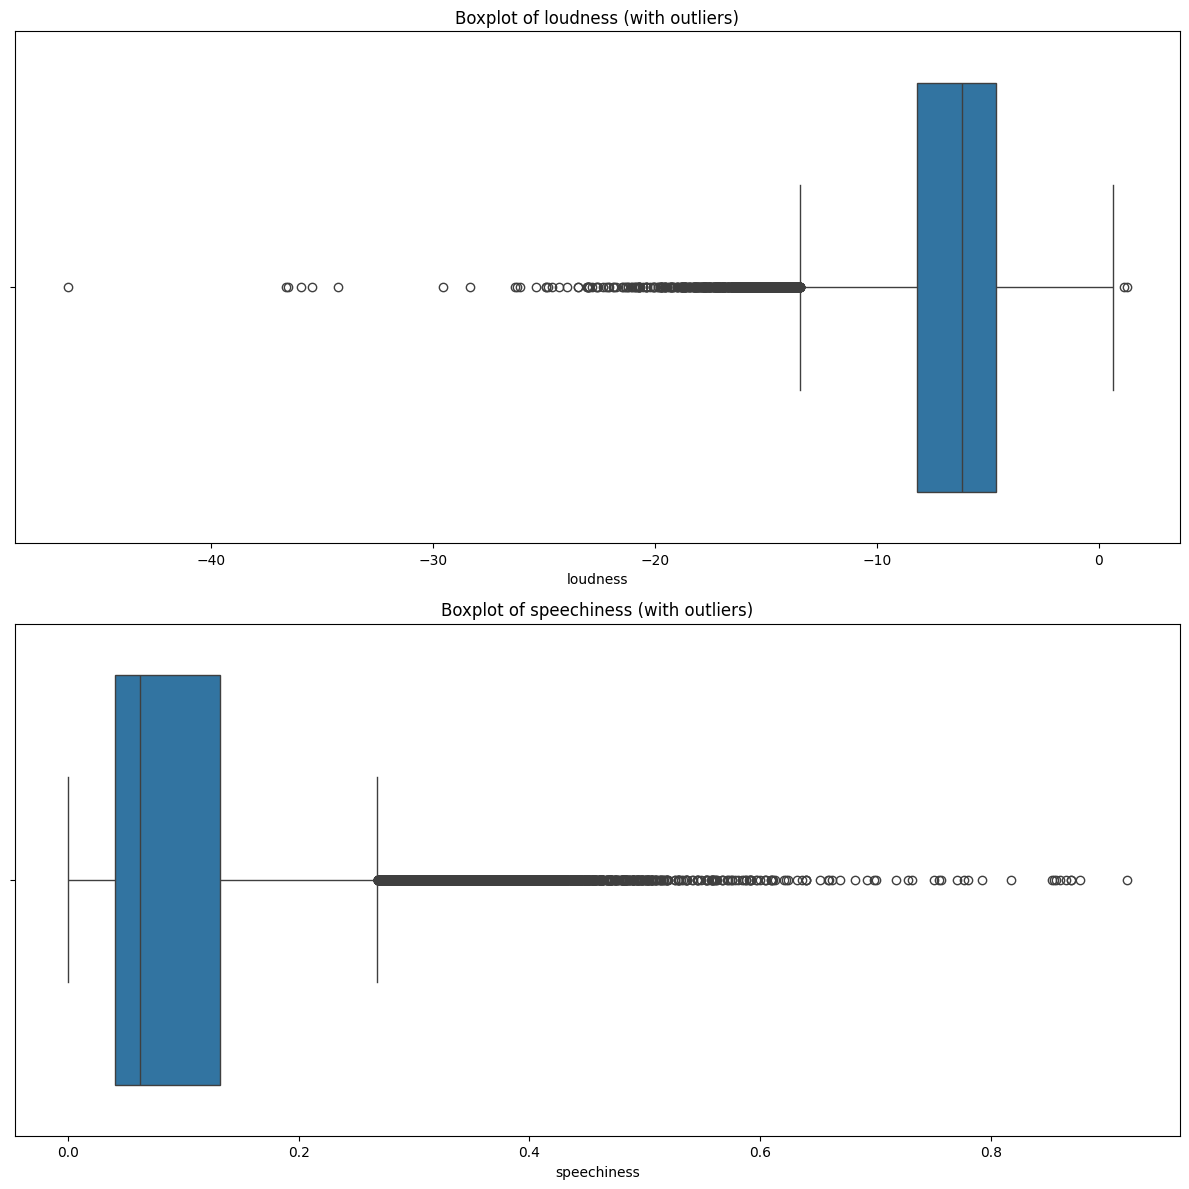

In [8]:
# Filter for columns where there are outliers (True)
columns_with_true_outliers = [
    col.split(" : ")[0] for col in outliers if col.endswith("True")
]

# Set up the figure
plt.figure(figsize=(12, 6 * len(columns_with_true_outliers)))

# Loop through the columns with outliers and plot a boxplot for each
for i, col in enumerate(columns_with_true_outliers, 1):
    plt.subplot(len(columns_with_true_outliers), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (with outliers)")

plt.tight_layout()
plt.show()

In [9]:
def remove_outliers(dataframe, col_names, q1=0.05, q3=0.95):
    df_without_outliers = dataframe.copy()

    for col_name in col_names:
        low_limit, up_limit = outlier_thresholds(df_without_outliers, col_name, q1, q3)
        df_without_outliers = df_without_outliers[
            ~(
                (df_without_outliers[col_name] < low_limit)
                | (df_without_outliers[col_name] > up_limit)
            )
        ]

    return df_without_outliers

In [10]:
columns_with_true_outliers

['loudness', 'speechiness']

In [11]:
df.shape

(32828, 23)

In [17]:
df_without_outliers = remove_outliers(df, columns_with_true_outliers)

In [18]:
df_without_outliers.shape

(32809, 23)